# Project 2

## About the dataset

  The data at hand contains medical costs of people  characterized by certain attributes.  
  Domain:   Healthcare  
  Context:  Leveraging customer information is paramount for most  businesses. In the case of an insurance company, attributes of  customers like the ones mentioned below can be crucial in  making business decisions. Hence, knowing to explore and  generate value out of such data can be an invaluable skill to  have.

Attribute Information:  
age: age of primary beneficiary  
sex: insurance contractor gender, female, male  
bmi: Body mass index, providing an understanding of body,  weights that are relatively high or low relative to height,  objective index of body weight (kg / m ^ 2) using the ratio of  height to weight, ideally 18.5 to 24.9  
children: Number of children covered by health insurance /  Number of dependents  
smoker: Smoking  
region: the beneficiary's residential area in the US, northeast,  southeast, southwest, northwest.  
charges: Individual medical costs billed by health insurance.    

Learning Outcomes:   ● Exploratory Data Analysis  ● Practicing statistics using Python  ● Hypothesis testing    

Objective:  
We want to see if we can dive deep into this data to find some  valuable insights.   Steps and tasks:    2.  3. Perform basic EDA which should include the following  and print out your insights at every step.  a. Shape of the data   b. Data type of each attribute  c. Checking the presence of missing values  d. 5 point summary of numerical attributes  e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.  f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns  g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns  h. Distribution of categorical columns (include  children)  i. Pair plot that includes all the columns of the data  frame   4. Answer the following questions with statistical evidence  a. Do charges of people who smoke differ significantly  from the people who don't?  b. Does bmi of males differ significantly from that of  females?  c. Is the proportion of smokers significantly different  in different genders?  d. Is the distribution of bmi across women with no  children, one child and two children, the same ? 

###### Step 1: Import the necessary libraries

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, ttest_1samp, wilcoxon, ttest_ind, chi2
import seaborn as sns
import matplotlib.cbook as cbook
from scipy import stats

###### Step 2 : Read the data as a data frame 

In [2]:
# read the data in pandas FROM A CSV
df = pd.read_csv("insurance.csv")

###### Step 3 : Shape of the data

In [3]:
df.shape

(1338, 7)

###### Step 4 :  Data type of each attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


###### Step 5: Checking the presence of missing values

In [5]:
if df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


In [6]:
Now, as we know that there no nulls/NaN values in our data frame, no replacement to be done

SyntaxError: invalid syntax (<ipython-input-6-5b89ff82613f>, line 1)

###### Step 6: 5 point summary of numerical attributes

In [ ]:
df.describe()

###### Step 7: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

In [ ]:
plt.title('Distribution of BMI')
plt.hist(df.bmi, color = "skyblue", edgecolor='black')
plt.ylabel('BMI')

Text(0,0.5,'AGE')

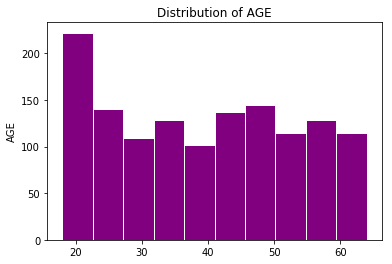

In [7]:
plt.title('Distribution of AGE')
plt.hist(df.age, color = "purple", edgecolor='white')
plt.ylabel('AGE')

Text(0,0.5,'CHARGES')

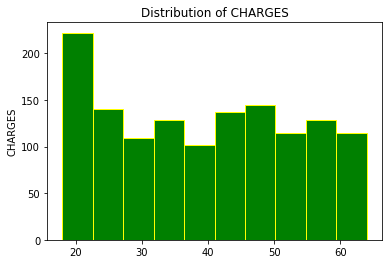

In [8]:
plt.title('Distribution of CHARGES')
plt.hist(df.age, color = "green", edgecolor='yellow')
plt.ylabel('CHARGES')

###### Step 8: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns 

The value of Skewness is:
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

BMI :The distribution is approximately symmetric.  Skew = 0.28
Age :The distribution is approximately symmetric.  Skew = 0.06
Charges :The distribution is positively skewed.  Skew = 1.52


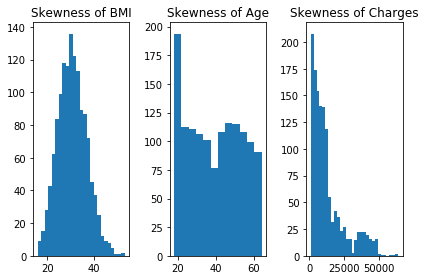

In [9]:
print("The value of Skewness is:")
#calculating the skewness
print(df.skew())
print("")

def skewness(skew,mean,median):
    if skew<-1 or skew>1:
        if mean>median:
            outcome="The distribution is positively skewed. "
        elif mean<median:
            outcome="The distribution is negatively skewed. "
    elif skew>-1 and skew<-0.5:
        outcome="The distribution is moderately skewed. "
    elif skew>-0.5 and skew<0.5:
            outcome="The distribution is approximately symmetric. "
    return outcome+" Skew = "+str(round(skew,2))

print("BMI :"+skewness(df.bmi.skew(),np.mean(df.bmi.mean()),np.mean(df.bmi.median())))
print("Age :"+skewness(df.age.skew(),np.mean(df.age.mean()),np.mean(df.age.median())))
print("Charges :"+skewness(df.charges.skew(),np.mean(df.charges.mean()),np.mean(df.charges.median())))

##If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1,
##the distribution is moderately skewed. 
###If skewness is between −½ and +½, the distribution is approximately symmetric.

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(df.bmi, bins='auto')
ax1.set_title('Skewness of BMI')
ax2.hist(df.age, bins='auto')
ax2.set_title('Skewness of Age')
ax3.hist(df.charges, bins='auto')
ax3.set_title('Skewness of Charges')
plt.tight_layout()

###### Step 9: Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns

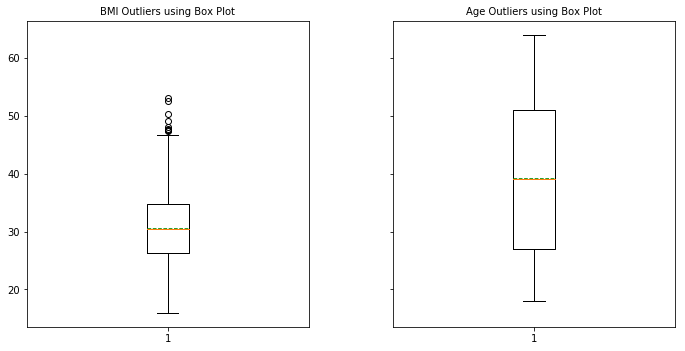

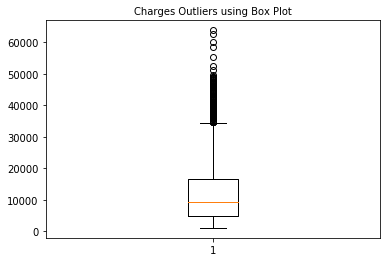

Outlier data points for BMI using Zscore
[49.06, 50.38, 52.58, 53.13]

Outlier data points for Age using Zscore
[]

Outlier data points for Charges using Zscore 
[51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]



In [10]:
###Using boxplot one can identify outliers
fs=10

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(hspace=10)
axes[0].boxplot(df.bmi,showmeans=True,meanline=True)
axes[0].set_title('BMI Outliers using Box Plot', fontsize=fs)

axes[1].boxplot(df.age,showmeans=True,meanline=True)
axes[1].set_title('Age Outliers using Box Plot', fontsize=fs)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig, ax = plt.subplots()
ax.boxplot(df.charges)
ax.set_title('Charges Outliers using Box Plot', fontsize=fs)

plt.show()

### Using Zscore  z score for each of the data point in the dataset and if the z score is greater than 3 than 
####we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.

def detect_outlier(data_1):

    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    outliers=[]    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

print("Outlier data points for BMI using Zscore") 
print(detect_outlier(df.bmi))
print("")

print("Outlier data points for Age using Zscore") 
print(detect_outlier(df.age))
print("")

print("Outlier data points for Charges using Zscore ") 
print(detect_outlier(df.charges))
print("")

###### Step 10 : Distribution of categorical columns (include  children)

Text(0.5,0.98,'Distribution of BMI across 3 category variables sex, smoker, region, Children')

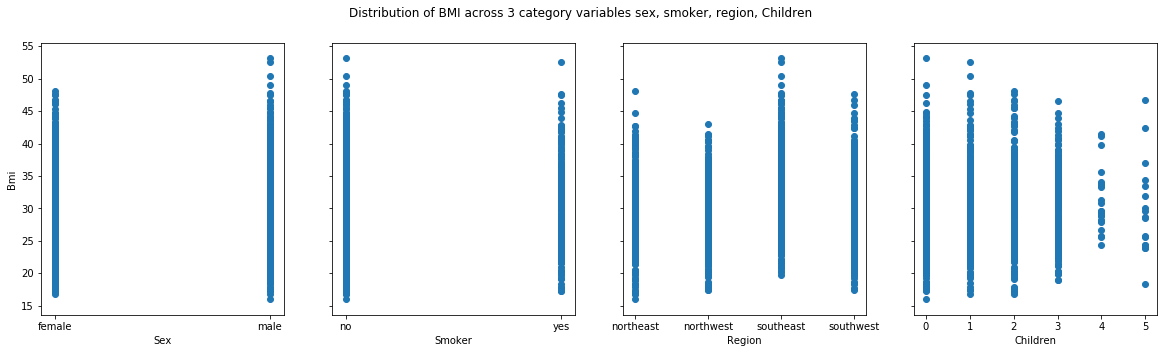

In [11]:
#ideal bmi 18.5 to 24.9 
fig, axs = plt.subplots(1,4, figsize=(20, 5), sharey=True)
axs[0].scatter(df.sex, df.bmi)
axs[1].scatter(df.smoker, df.bmi)
axs[2].scatter(df.region, df.bmi)
axs[3].scatter(df.children, df.bmi)
axs[0].set_ylabel('Bmi')
axs[0].set_xlabel('Sex')
axs[1].set_xlabel('Smoker')
axs[2].set_xlabel('Region')
axs[3].set_xlabel('Children')
fig.suptitle('Distribution of BMI across 3 category variables sex, smoker, region, Children')

# Inference1: BMI for southeast higher than rest of the population
# Inference2: BMI of male more than female

Text(0.5,0.98,'Distribution of Charges across 3 category variables sex, smoker, region')

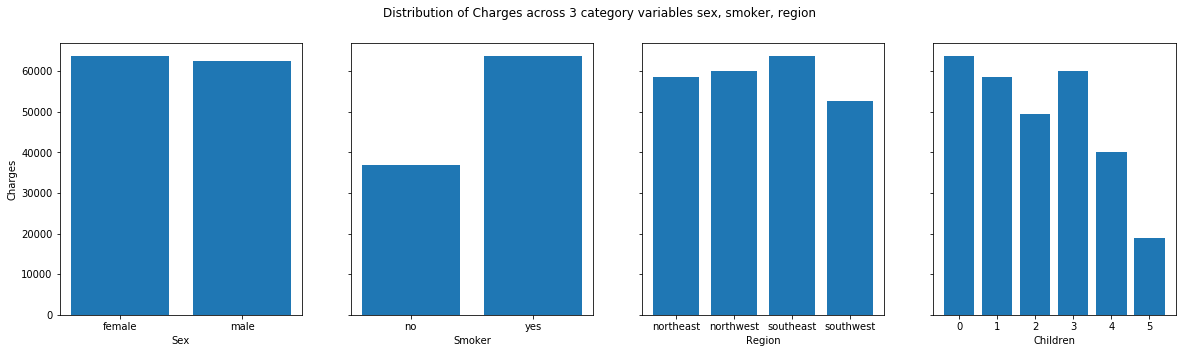

In [12]:
#ideal bmi 18.5 to 24.9 
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axs[0].bar(df.sex, df.charges)
axs[1].bar(df.smoker, df.charges)
axs[2].bar(df.region, df.charges)
axs[3].bar(df.children, df.charges)
axs[0].set_ylabel('Charges')
axs[0].set_xlabel('Sex')
axs[1].set_xlabel('Smoker')
axs[2].set_xlabel('Region')
axs[3].set_xlabel('Children')
fig.suptitle('Distribution of Charges across 3 category variables sex, smoker, region')

# Inference1: Charges of smoker more than non smoker
# Inference2: Females are paying more charges than male
# Inference3: Southeast are paying more charges than other region
# Inference4: People having 0 children pay more charges than others

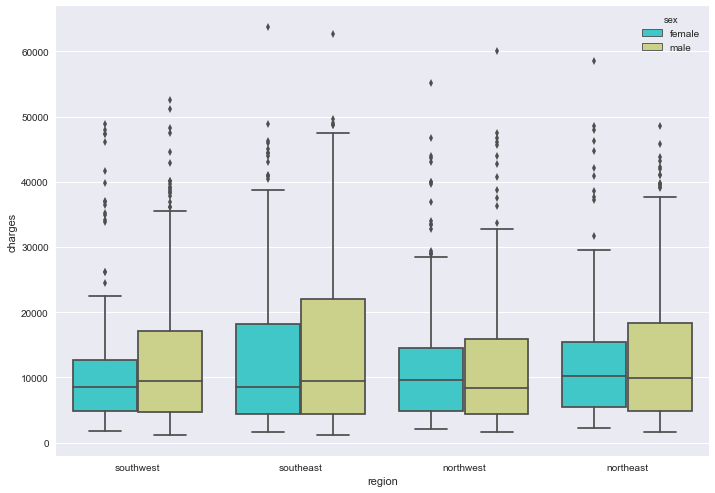

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="region", y="charges", hue="sex", data=df,palette='rainbow')

#Inference 3: For smoker charges are higher than the nonsmoker

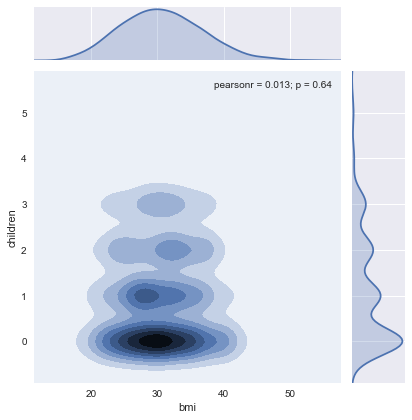

In [14]:
sns.jointplot(x="bmi", y="children", data=df, kind="kde");
##Inference 4: High bmi observed with people having no children

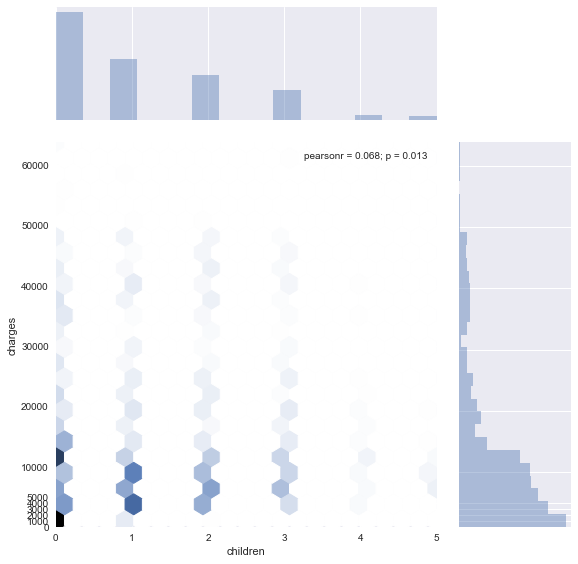

In [15]:
plot=sns.jointplot(x="children", y="charges", data=df,kind="hex",size=8, ratio=3);
plot.ax_joint.set_yticks([0,1000,2000,3000,4000, 5000,10000,20000,30000,40000,50000,60000])
#Inference 5: maximum  charges for people having 1 child and paid around 3000 to 4000

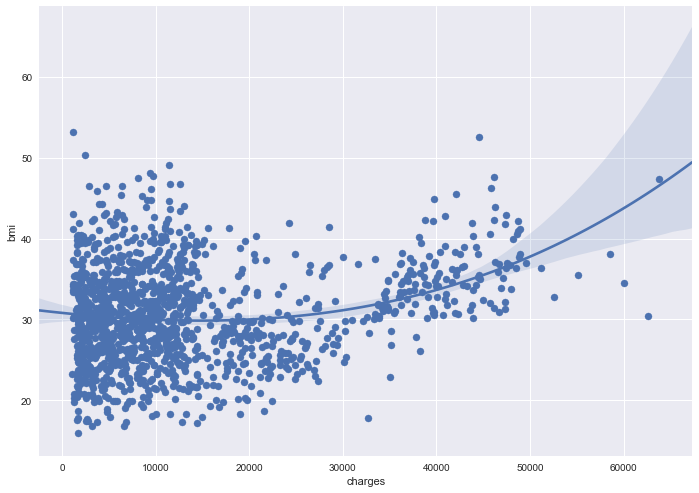

In [16]:
sns.regplot(data=df,
            y='bmi',
            x="charges",
            x_estimator=np.mean,
            order=3)

plt.show()
plt.clf()

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


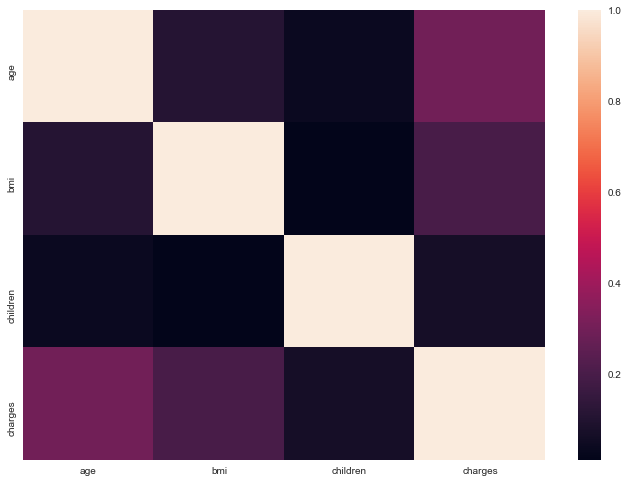

In [17]:
corr = df.corr()
print(corr)
sns.heatmap(corr)

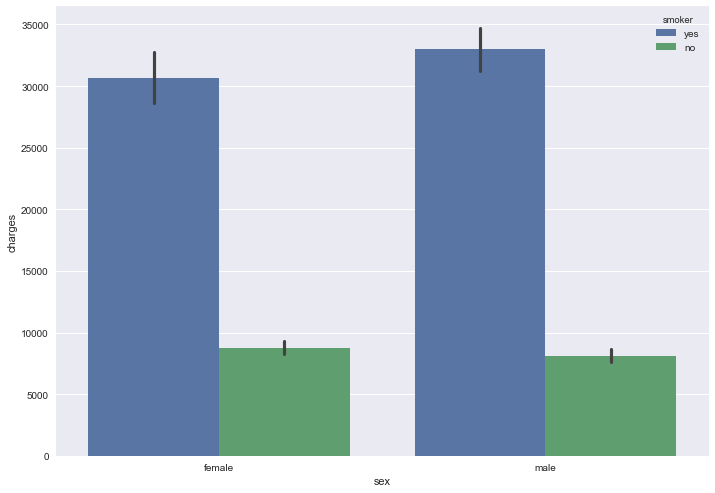

In [18]:
sns.barplot(data=df,
            y='charges',
            x='sex',hue="smoker")

plt.show()
plt.clf()

###### Step 11:  Pair plot that includes all the columns of the data  frame

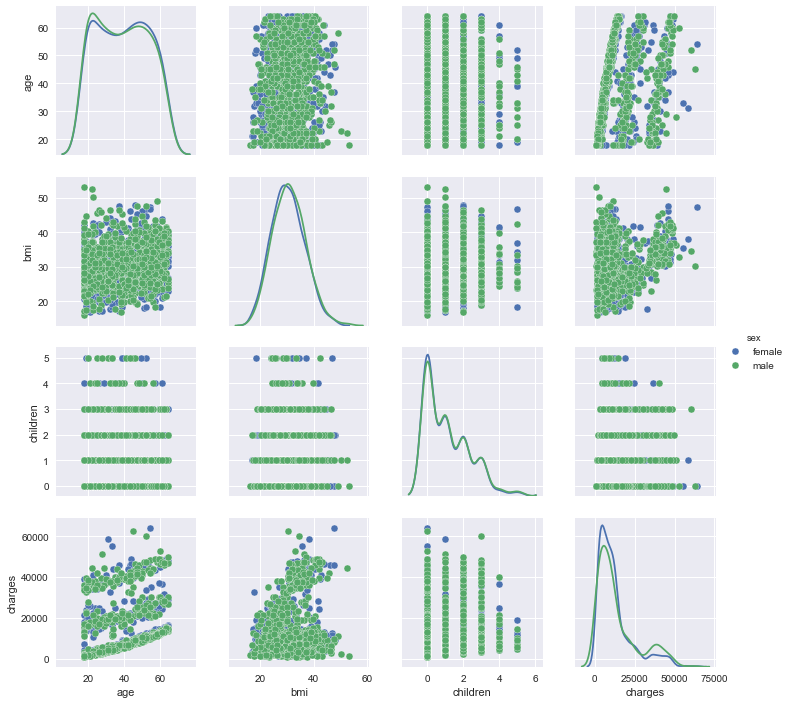

In [19]:
sns.pairplot(df,hue="sex",diag_kind="kde");

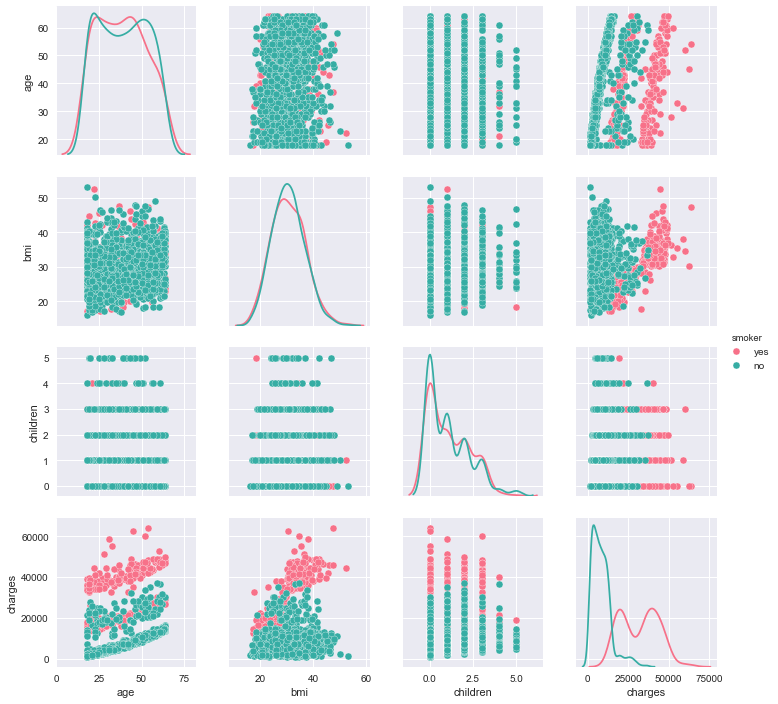

In [20]:
sns.pairplot(df,hue="smoker",palette="husl",diag_kind="kde");

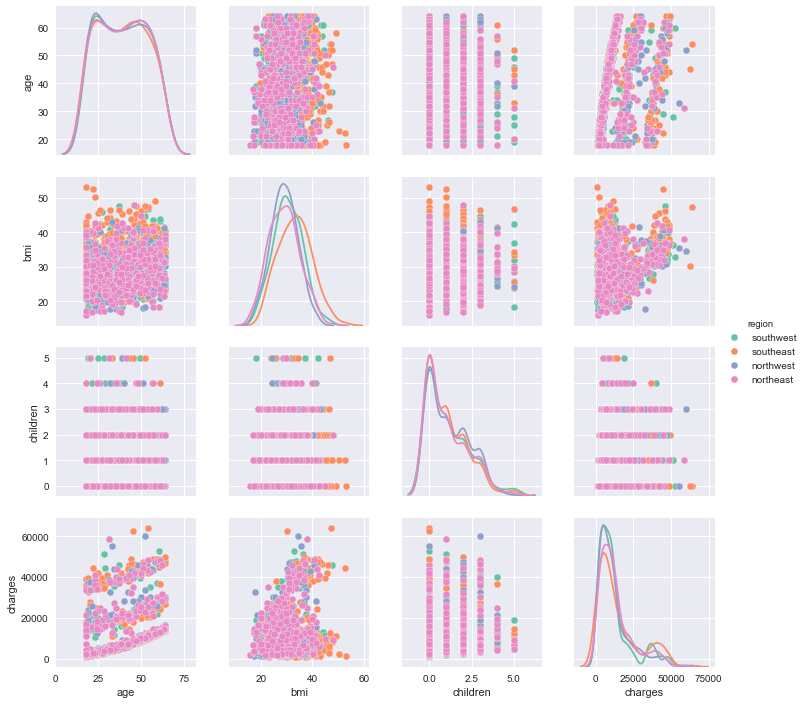

In [21]:
sns.pairplot(df,hue="region",palette="Set2",diag_kind="kde");

# Answer the following questions with statistical evidence

## Question A. Do charges of people who smoke differ significantly  from the people who don't?

#### Step 1: Finding the distribution of the 2 population i.e, smoker and non smoker with respect to charges

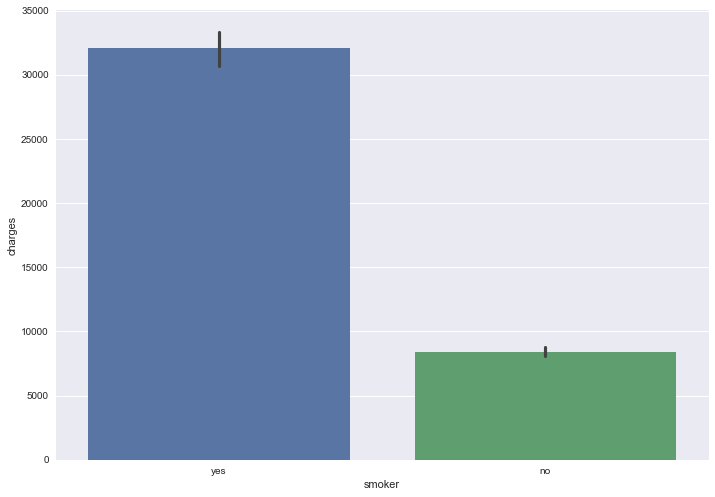

In [22]:
sns.barplot(data=df,
            y='charges',
            x='smoker')

plt.show()
plt.clf()


C:\Users\Radhika\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


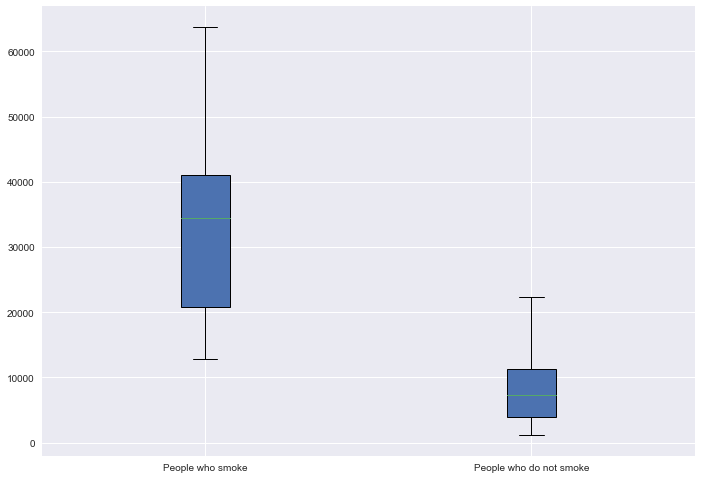

In [86]:
people_smoke=df[df['smoker']=='yes']
people_donot_smoke=df[df['smoker']=='no']
box_plot_data=[people_smoke.charges,people_donot_smoke.charges]
plt.boxplot(box_plot_data,patch_artist=True,labels=['People who smoke','People who do not smoke'])
plt.show()

#### Step 2: Finding the significance level of charges between smoker and non smoker, assuming,
H0 - Charges of people who smoke is equal to charges of people who do not smoke

HA - Charges of people who smoke is not equal to charges of people who do not smoke

In [87]:
smoke=people_smoke.charges
donotsmoke=people_donot_smoke.charges
t_statistic, p_value = ttest_ind(donotsmoke, smoke)
print(t_statistic, p_value)
if p_value<0.05:
    print("Reject H0, i.e,Charges of people who smoke is not equal to charges of people who do not smoke they dont have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)
else:
    print("Failed to Reject H0, i.e, Charges of people who smoke is equal to charges of people who do not smoke, they have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)

-46.664921172723716 8.271435842177219e-283
Reject H0, i.e,Charges of people who smoke is not equal to charges of people who do not smoke they dont have the same mean at 5% significance level
two-sample t-test p-value= 8.271435842177219e-283


### Answer A:

#### 1. From the above 2 graphs it is clear that smokers are paying more charges than non smokers

#### 2. From the 2 sample test, it is observed that there is a significant difference in charges between smoker and non smoker and we have rejected the null hypothesis

## Question B. Does bmi of males differ significantly from that of  females?  

#### Step 1: Finding the distribution of the 2 population i.e, male and female with respect to BMI

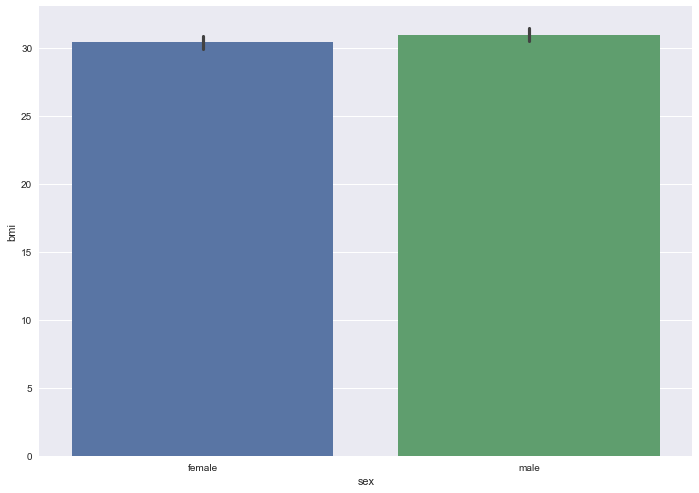

In [359]:
sns.barplot(data=df,
            y='bmi',
            x='sex')

plt.show()
plt.clf()

C:\Users\Radhika\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


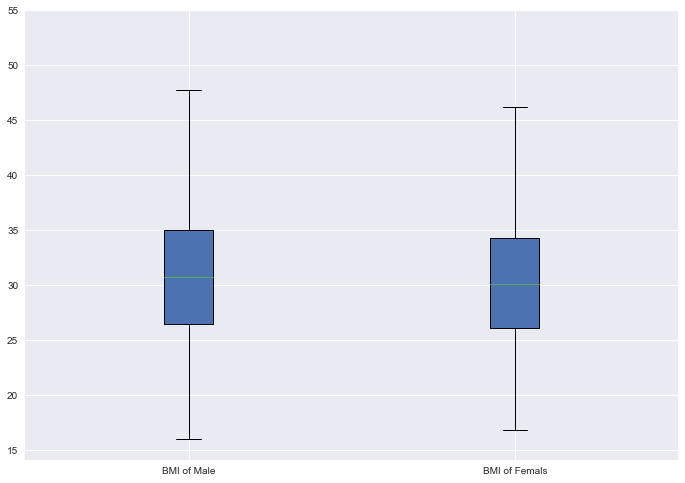

In [88]:
male=df[df['sex']=='male']
female=df[df['sex']=='female']
box_plot_data=[male.bmi,female.bmi]
plt.boxplot(box_plot_data,patch_artist=True,labels=['BMI of Male','BMI of Femals'])
plt.show()

#### Step 2: Finding the significance level of BMI between male and female, assuming,
H0 - BMI of male  is equal to BMI of female

HA - BMI of male  is not equal to BMI of female

In [89]:
bmi_male=male.bmi
bmi_female=female.bmi
t_statistic, p_value = ttest_ind(bmi_male, bmi_female)
print(t_statistic, p_value)
if p_value<0.05:
    print("Reject H0, i.e, BMI of male  is not equal to BMI of female and they dont have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)
else:
    print("Failed to Reject H0, i.e, BMI of male  is equal to BMI of female, there is no significance between data set, they have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)

1.696752635752224 0.08997637178984932
Failed to Reject H0, i.e, BMI of male  is equal to BMI of female, there is no significance between data set, they have the same mean at 5% significance level
two-sample t-test p-value= 0.08997637178984932


### Answer:

#### 1. From the above 2 graphs it is clear that there is no significant difference in BMI of male and female does not differ significantly from each other 

#### 2. From the outcome of the 2 sample t-test, it is proven that there is no significant difference in BMI of male and female

## Question C. Is the proportion of smokers significantly different  in different genders?  

### Step 1: Finding the distribution of the smoker between the 2 different genders using count plot

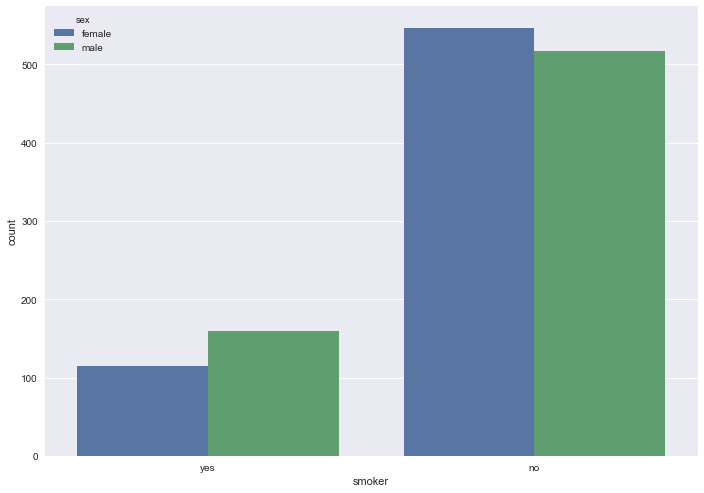

In [367]:
sns.countplot(data=df,
              x="smoker",
              hue="sex")

plt.show()
plt.clf()

#### Step 2: Finding the significance level of smokers between male and female, assuming,
H0 - Smoker in male population  is equal to nos of smokers in female population

HA - Smoker in male population  is significantly different to nos of smokers in female population

In [84]:
contingency_table=pd.crosstab(df["sex"],df["smoker"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0 using critical value, Smoker in male population  is significantly different to nos of smokers in female population")
else:
    print("Retain H0 using critical value, Smoker in male population is equal to nos of smokers in female population")
    
if p_value<=alpha:
    print("Reject H0 using alpha,Smoker in male population  is significantly different to nos of smokers in female population")
else:
    print("Retain H0 using alpha,Smoker in male population is equal to nos of smokers in female population")


contingency_table :-
 smoker   no  yes
sex             
female  547  115
male    517  159
Observed Values :-
 [[547 115]
 [517 159]]
Expected Values :-
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
Degree of Freedom:- 1
chi-square statistic:- 7.765921028604451
critical_value: 3.8414588206941236
p-value: 0.005324114164320548
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 7.765921028604451
critical_value: 3.8414588206941236
p-value: 0.005324114164320548
Reject H0 using critical value, Smoker in male population  is significantly different to nos of smokers in female population
Reject H0 using alpha,Smoker in male population  is significantly different to nos of smokers in female population


### Answer:

#### 1. From the above count plot it is clear that smokers in male population is different to nos of smokers in female population

#### 2. From the outcome of the chi-square statistic, it is proven that smoker in male population  is significantly different to nos of smokers in female population

## Question D. Is the distribution of bmi across women with no  children, one child and two children, the same ? 

#### Step 1: Finding the distribution of the smoker between the 2 different genders using count plot

C:\Users\Radhika\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


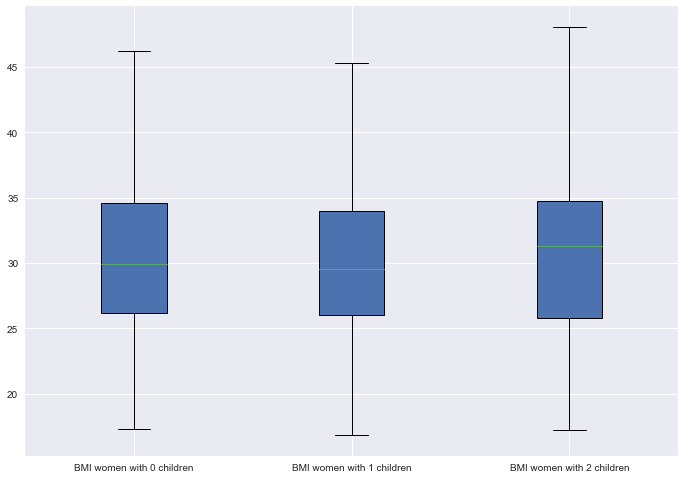

In [79]:
df_anova = df[df['sex']=='female']
df_anova=df_anova[['bmi','children']]
grps = pd.unique(df_anova.children.values)
d_data = {grp:df_anova['bmi'][df_anova.children == grp] for grp in grps}
box_plot_data=[d_data[0],d_data[1],d_data[2]]
plt.boxplot(box_plot_data,patch_artist=True,labels=['BMI women with 0 children','BMI women with 1 children','BMI women with 2 children'])
plt.show()

#### Step 2: Finding the significance level of bmi across women with no children, one child and 2 child
H0 - bmi across women with no children, one child and 2 child is same

HA - bmi across women with no children, one child and 2 child is not same

In [73]:
F, p = stats.f_oneway(d_data[0], d_data[1], d_data[2])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis, bmi across women with no children, one child and 2 child is not same ")
else:
    print("accept null hypothesis, bmi across women with no children, one child and 2 child is same")

p-value for significance is:  0.6591330886467935
accept null hypothesis, bmi across women with no children, one child and 2 child is same


## Answer:

### 1. From the above graphs it is clear that there is no significant difference in BMI of women with 0, 1 and 2 children

### 2. Also, from the outcome of the One Way F-test(Anova), the p value for significance is 0.66 which is proves that there is no significant difference in BMI across women with no children, one child and 2 children